## Imports

In [1]:
# Imports
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import torch
from monai.transforms import ScaleIntensityRange


# DATA UNDERSTANDING #

### Showing individual scan

In [7]:
#data imports
dataset_path = 'L:/Basic/divi/jstoker/slicer_pdac/Master Students WS 24/Martijn/data/Training/paired_scans'
dataset_segmentation_path = 'L:/Basic/divi/jstoker/slicer_pdac/Master Students WS 24/Martijn/data/labels made by AI model cropped'

#first image as an example
image = nib.load(os.path.join(dataset_path, 'CAESAR082_0.nii.gz'))
image_data = image.get_fdata()

# Check the data type of the image data
print("Data type:", image_data.dtype)

#show an example image
plt.imshow(image_data[:,:,50], cmap='gray')

Data type: float64


OSError: [Errno 22] Invalid argument

In [4]:
#show segmentation
segm_img = nib.load(os.path.join(dataset_segmentation_path, 'CAESAR001_0.nii.gz'))
segm_img_data = segm_img.get_fdata()
segm_img_header = segm_img.header

#show an example image
plt.imshow(segm_img_data[:,:,40])


FileNotFoundError: No such file or no access: 'L:/Basic/divi/jstoker/slicer_pdac/Master Students WS 24/Martijn/data/labels made by AI model cropped/CAESAR001_0.nii.gz'

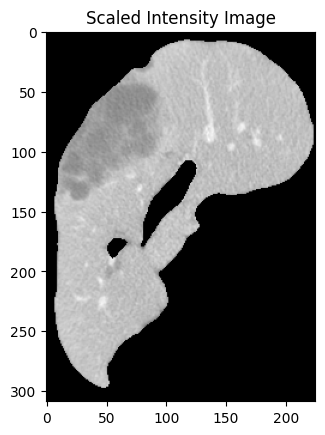

metatensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [19]:
# Load the paired scan
paired_scans_path = 'L:/Basic/divi/jstoker/slicer_pdac/Master Students WS 24/Martijn/data/Training/paired_scans'
scan_path = os.path.join(paired_scans_path, 'CAESAR082_0.nii.gz')
paired_scan = nib.load(scan_path)
paired_scan_data = paired_scan.get_fdata()

# Apply ScaleIntensity transform
scale_intensity_transform = ScaleIntensityRange(a_min=-200,
                                                                 a_max=400, b_min=0.0, b_max=1.0, clip=True)
scaled_paired_scan_data = scale_intensity_transform(paired_scan_data)

# Show the scaled image
plt.imshow(scaled_paired_scan_data[:, :, 50], cmap='gray')
plt.title("Scaled Intensity Image")
plt.show()

scaled_paired_scan_data[:, :, 50]

## testing correct resize

In [ ]:
all_scans_path = 'L:/Basic/divi/jstoker/slicer_pdac/Master Students WS 24/Martijn/data/Training/all_scans'
output_folder = 'L:/Basic/divi/jstoker/slicer_pdac/Master Students WS 24/Martijn/data/Training'

# Load the scan
scan_path = os.path.join(all_scans_path, 'CAESAR001_0_0000.nii.gz')
scan = nib.load(scan_path)
scan_data = scan.get_fdata()

print("Original scan shape:", scan_data.shape)
# Define the desired output size
output_size = (256, 256, 64)  # Example size

# Resize the scan using MONAI
resize_transform = Compose([Resize(spatial_size=output_size, mode='trilinear')])
resized_scan_data = resize_transform(scan_data)
print("Resized scan shape:", resized_scan_data.shape)


Original scan shape: (512, 512, 208)


RuntimeError: applying transform <monai.transforms.spatial.array.Resize object at 0x0000014C49448B20>

## Calculate class weights

In [ ]:
print("Current working directory:", os.getcwd())


# Read the CSV file
training_labels = pd.read_csv(os.path.join(os.getcwd(), "training_labels.csv"))

# Count occurrences of 1 in all columns separately
occurrences = training_labels.eq(1).sum()

class_counts = occurrences.tolist()
print(class_counts)

total_size = training_labels.shape[0]

class_weights = total_size / (torch.tensor(class_counts, dtype=torch.float32) + 1e-6)   #avoid division by zero
class_weights = torch.tensor(class_weights, dtype=torch.float32)
print(class_weights)

Current working directory: c:\Users\P095550\OneDrive - Amsterdam UMC\Documenten\GitHub\CRLM-morph-features
[50, 36, 28, 237, 119, 32, 244, 99, 24]


C:\Users\P095550\AppData\Local\Temp\ipykernel_14840\1598768005.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights = torch.tensor(class_weights, dtype=torch.float32)


tensor([ 5.7600,  8.0000, 10.2857,  1.2152,  2.4202,  9.0000,  1.1803,  2.9091,
        12.0000])
